<h1><center></center></h1>
<h1><center>Internship on DSA-Project 2</center></h1>
<h1><center>Customer Segmentation for Marketing Strategy</center></h1>

# Phase 1: Week 1 - Project Kick-off and Data Collection

## 1.0 Dataset Description


### **Description of the variables in the dataset:**

#### **Bank client data:**

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'primary', 'secondary', 'tertiary', 'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
housing: has housing loan? (categorical: 'no','yes','unknown')
6. balance: bank balance
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### **Related with the last contact of the current campaign:**

1. communication_type: contact communication type (categorical: 'cellular','telephone')
2. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
3. day_of_month: last contact day of the month (categorical:1 to 31)
4. last_contact_duration: last contact duration, in seconds (numeric).

#### **Other attributes:**

1. num_contacts_in_campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. days_since_prev_campaign_contact: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
3. num_contacts_prev_campaign: number of contacts performed before this campaign and for this client (numeric)
4. prev_campaign_outcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Social and economic context attributes:

#### **Output variable (desired target):**

1. term_deposit_subscribed - has the client subscribed a term deposit? (binary: 'yes','no')

## 1.1 Import Dependencies and Data Collection

### 1.1.1 Importing necessary libraries

#### MLFLow

In [2]:
pip install pyngrok --quiet

In [3]:
pip install mlflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [4]:
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download artifacts from an MLflow...
  db           Commands for managing an MLflow tracking database.
  deployments  Deploy MLflow models to custom targets.
  doctor       Prints out useful information for debugging issues with MLflow.
  experiments  Manage experiments.
  gc           Permanently delete runs in the `deleted` lifecycle stage.
  models       Deploy MLflow models locally.
  recipes      Run MLflow Recipes and inspect recipe results.
  run          Run an MLflow project from the given URI.
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.


#### importing necessary libraries

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.feature_selection import *

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score

from sklearn.metrics import classification_report

In [ ]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment('Segmentation')

mlflow.sklearn.autolog(disable=True)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### 1.1.2 Importing Data

In [ ]:
# loading the Training dataset and saving it as cust_seg_data
cust_seg_data = pd.read_csv('/content/Train.csv')

In [ ]:
#copying and saving the dataset as data inorder to retain the original dataset
data = cust_seg_data.copy()
data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


### 1.1.3 Understanding the DataFrame

In [ ]:
# displays the size of the dataset
data.shape

(31647, 18)

The Dataframe contains **31647 rows** and **18 columns**

In [ ]:
# gives an idea about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [ ]:
# gives the count of different datatypes variables in the dataset
data.dtypes.value_counts()

object     10
float64     5
int64       3
Name: count, dtype: int64

In [ ]:
# counts the number of null values
data.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

#### From the above metrics we can conclude that:
* There are **7** Features or columns having null values, columns consists of **5 numericals columns** and **2 Catergorical columns**
* The Feature **"days_since_prev_campaign_contact"** is having **25831 rows** of null values which is **81.6%** of total rows and this feature **must be Removed**.
* The other 6 Features can be imputed using various techniques.

In [ ]:
# displays the count of duplicates
data.duplicated().sum()

0

In [ ]:
# gives the count of unique values in the variables
data.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

#### From the above metrics conclusion is made:
* **id** columns contains unique values and should be removed.


### 1.1.4 Removing Columns

In [ ]:
data.drop(['id','days_since_prev_campaign_contact'], axis=1, inplace=True)

In [ ]:
data.shape

(31647, 16)

## 1.2 Data Preprocessing - Missing value imputation

### 1.2.1 Analysing distributions of Feature with null values .

In [ ]:
# Extracting columns having null values
col = data.columns
imp_list=[]
for i in col:
  if data[i].isna().sum() > 0:
    imp_list.append(i)

imp_list

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign']

In [ ]:
# classifying null value columns into numerical and categorical
num_imp_list = data[imp_list].select_dtypes(include='number').columns
cat_imp_list = data[imp_list].select_dtypes(include='object').columns
num_imp_list, cat_imp_list

(Index(['customer_age', 'balance', 'last_contact_duration',
        'num_contacts_in_campaign'],
       dtype='object'),
 Index(['marital', 'personal_loan'], dtype='object'))

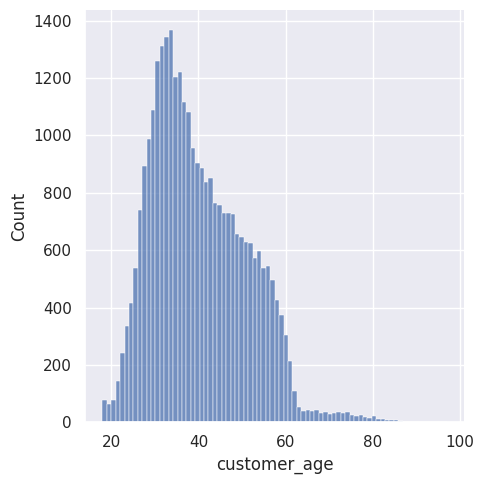

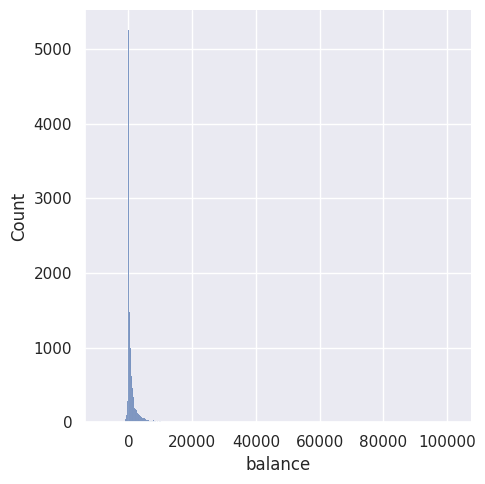

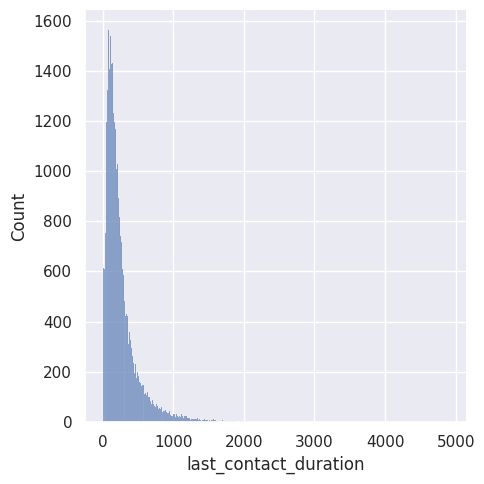

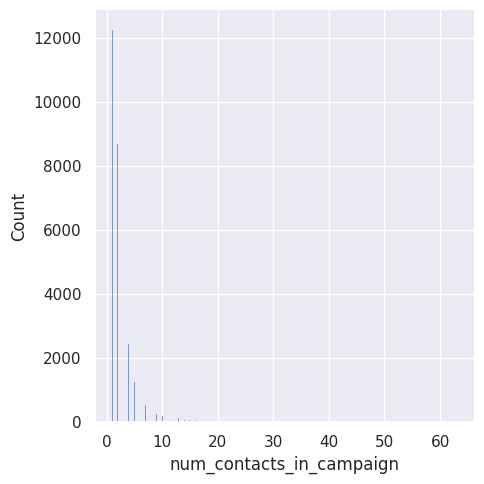

In [ ]:
# analysing the numerical distribution
for i in num_imp_list:
  sns.displot(data[i])
  plt.show()

In [ ]:
# Also checking the skew
for i in num_imp_list:
  sk=round(data[i].skew(),3)
  print(f'Skewness of {i} :::: {sk}')

Skewness of customer_age :::: 0.662
Skewness of balance :::: 8.505
Skewness of last_contact_duration :::: 3.166
Skewness of num_contacts_in_campaign :::: 5.0


#### Conclusion
* From the above Distribution plots and skewness measure we can conclude the numerical features containing null value are **Right Skewed** and need to be imputed using **Median value** in each Feature.
* The Categorical null values must be imputed using **Mode**.

### 1.2.2 Impution missing values.

In [ ]:
# Numerical columns
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
# catergorical columns
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data1 = data.copy()

data1[num_imp_list] = imp_median.fit_transform(data1[num_imp_list])
data1[cat_imp_list] = imp_mode.fit_transform(data1[cat_imp_list])

In [ ]:
data1.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

## 1.3 Data Preprocessing - Outlier Detection

### 1.3.1 Percentage wise distribution of outliers in each feature.

In [ ]:
numerical_columns = data1.select_dtypes(include=['number']).columns.tolist()

outlier_info = {}

for col in numerical_columns:
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data1[col] < lower_bound) | (data1[col] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(data1)) * 100

    outlier_info[col] = {'Number of Outliers': len(outliers),'Percentage of Outliers': outlier_percentage}

outlier_df = pd.DataFrame.from_dict(outlier_info).transpose()
outlier_df

,Number of Outliers,Percentage of Outliers
customer_age,257.0,0.812083
balance,3381.0,10.683477
day_of_month,0.0,0.000000
last_contact_duration,2328.0,7.356148
num_contacts_in_campaign,2178.0,6.882169
num_contacts_prev_campaign,5816.0,18.377729
term_deposit_subscribed,3394.0,10.724555


### 1.3.2 Function for Analysing Outliers in continuous Features

In [ ]:
df = data.copy()

class DataFrameOutlierDetector:
  def __init__(self, df):
    self.df = df

  def detect_outliers(self, column_name):

    Q1 = self.df[column_name].quantile(0.25)
    Q3 = self.df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = self.df[(self.df[column_name] < lower_bound) | (self.df[column_name] > upper_bound)]

    outlier_df=pd.DataFrame(outliers)
    return outlier_df

  def outlier_describe(self, column_name):

    original_stats = self.df[column_name].describe()
    outlier = self.detect_outliers(column_name)
    non_outliers = self.df[~self.df.index.isin(outlier.index)]
    non_outlier_stats = non_outliers[column_name].describe()

    return pd.DataFrame({
        'with_outliers': original_stats,
        'without_outliers': non_outlier_stats
    })

  def plot_box(self, column_name):

    plt.figure(figsize=(6, 4))
    self.df.boxplot(column=column_name)
    plt.title(f'Box plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

detector = DataFrameOutlierDetector(df)

#### 1. Customer Age

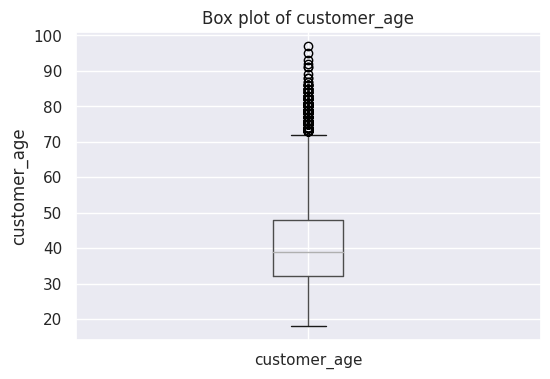

In [ ]:
detector.plot_box('customer_age')

In [ ]:
detector.detect_outliers('customer_age')

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
261,78.0,retired,married,secondary,no,8303.0,no,no,telephone,9,jun,730.0,1.0,12,failure,1
302,76.0,retired,married,secondary,no,2656.0,no,no,cellular,10,nov,261.0,5.0,0,unknown,1
521,73.0,retired,married,primary,no,-5.0,no,no,cellular,28,jun,344.0,6.0,6,failure,0
620,88.0,retired,married,primary,no,5235.0,no,no,telephone,1,apr,568.0,2.0,0,unknown,1
638,73.0,retired,divorced,primary,no,803.0,no,no,cellular,9,sep,460.0,5.0,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30745,74.0,retired,divorced,primary,no,2688.0,no,no,cellular,21,oct,115.0,2.0,0,unknown,1
31108,78.0,retired,divorced,primary,no,953.0,no,no,cellular,27,sep,186.0,2.0,1,other,1
31221,77.0,retired,married,unknown,no,995.0,no,no,cellular,27,oct,125.0,2.0,0,unknown,0
31410,76.0,retired,married,primary,no,297.0,no,no,cellular,7,sep,518.0,2.0,0,unknown,0


In [ ]:
detector.outlier_describe('customer_age')

,with_outliers,without_outliers
count,31028.000000,30771.000000
mean,40.439216,40.125183
std,10.751392,10.221788
min,18.000000,18.000000
25%,32.000000,32.000000
50%,39.000000,38.000000
75%,48.000000,48.000000
max,97.000000,72.000000


#### 2. Balance

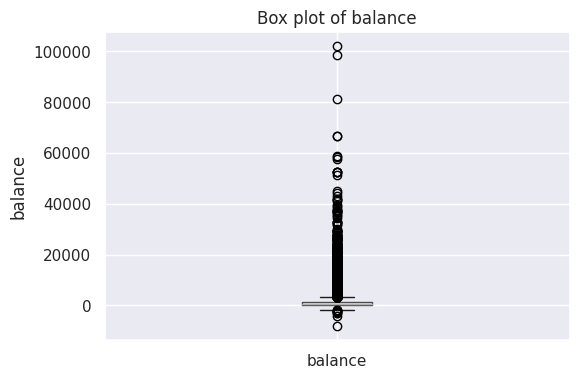

In [ ]:
detector.plot_box('balance')

In [ ]:
detector.detect_outliers('balance')

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
11,35.0,technician,single,secondary,no,5212.0,yes,no,cellular,7,may,303.0,2.0,0,unknown,0
13,50.0,management,married,secondary,no,4873.0,no,no,telephone,6,feb,381.0,6.0,9,failure,0
28,45.0,admin.,single,secondary,no,10390.0,yes,no,cellular,20,nov,101.0,1.0,0,unknown,0
47,32.0,management,married,secondary,no,4136.0,yes,no,cellular,12,may,94.0,4.0,0,unknown,0
59,47.0,management,married,tertiary,no,4113.0,no,no,cellular,18,aug,128.0,13.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31607,37.0,management,married,tertiary,no,12857.0,yes,no,unknown,30,may,419.0,1.0,0,unknown,0
31609,43.0,self-employed,married,tertiary,no,5996.0,yes,no,cellular,18,nov,281.0,1.0,0,unknown,0
31616,54.0,technician,divorced,primary,no,7292.0,yes,no,unknown,30,may,160.0,1.0,0,unknown,0
31617,51.0,blue-collar,married,tertiary,no,5418.0,yes,no,cellular,21,nov,59.0,3.0,0,unknown,0


In [ ]:
detector.outlier_describe('balance')

,with_outliers,without_outliers
count,31248.000000,27939.000000
mean,1368.112615,634.692795
std,3085.342417,836.403736
min,-8020.000000,-1938.000000
25%,72.000000,44.000000
50%,449.000000,348.000000
75%,1413.000000,972.000000
max,102128.000000,3424.000000


#### 3. Last Contact Duration

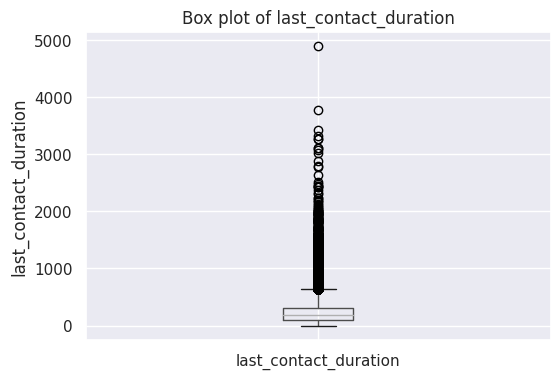

In [ ]:
detector.plot_box('last_contact_duration')

In [ ]:
detector.detect_outliers('last_contact_duration')

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
6,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,0,unknown,1
10,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,19,nov,1195.0,3.0,1,failure,0
38,30.0,self-employed,married,secondary,no,580.0,yes,no,cellular,13,oct,834.0,1.0,6,failure,0
53,30.0,management,single,tertiary,no,39.0,yes,no,cellular,15,may,900.0,3.0,2,other,1
79,26.0,technician,single,secondary,no,249.0,no,no,cellular,29,jan,716.0,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31576,33.0,technician,married,secondary,no,542.0,yes,no,cellular,16,apr,1575.0,1.0,4,failure,1
31583,47.0,blue-collar,divorced,primary,no,127.0,yes,no,unknown,3,jun,2450.0,2.0,0,unknown,1
31585,32.0,self-employed,married,secondary,no,5612.0,yes,no,cellular,28,jul,716.0,3.0,0,unknown,1
31638,28.0,entrepreneur,married,secondary,no,NaN,yes,no,unknown,27,may,1303.0,1.0,0,unknown,0


In [ ]:
detector.outlier_describe('last_contact_duration')

,with_outliers,without_outliers
count,31336.000000,29047.000000
mean,256.184038,201.062244
std,256.181479,138.775971
min,0.000000,0.000000
25%,103.000000,97.000000
50%,179.000000,167.000000
75%,315.250000,274.000000
max,4900.000000,633.000000


### 1.3.4 Conclusion

#### After analysing the Outliers present in the data come to the conclustion that these are **genuine outliers** and not typos or error in the data

## 1.4 Data Transformations - Part 1

### 1.4.1 Converting Months in short name to numeric format  

In [ ]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Replace month short names with month numbers
data1['month'] = data1['month'].replace(month_map)

### 1.4.2 Encoding Binary catergorical columns

In [ ]:
cat_columns = data1.select_dtypes(include=['object']).columns

binary_columns = [col for col in cat_columns if data1[col].nunique() == 2]

ohe = OneHotEncoder(drop='first')

data2 = data1.copy()
le= LabelEncoder()

# Apply LabelEncoder to binary categorical columns
for col in binary_columns:
    data2[col] = le.fit_transform(data2[col])

In [ ]:
data2.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,0,285.0,1,0,unknown,26,6,303.0,4.0,0,unknown,0
1,34.0,blue-collar,married,secondary,0,934.0,0,1,cellular,18,11,143.0,2.0,1,other,0
2,46.0,technician,married,secondary,0,656.0,0,0,cellular,5,2,101.0,4.0,0,unknown,0
3,34.0,services,single,secondary,0,2.0,1,0,unknown,20,5,127.0,3.0,0,unknown,0
4,41.0,blue-collar,married,primary,0,1352.0,1,0,cellular,13,5,49.0,2.0,0,unknown,0


In [ ]:
data2['job_type'].unique()

array(['management', 'blue-collar', 'technician', 'services', 'retired',
       'entrepreneur', 'admin.', 'student', 'housemaid', 'self-employed',
       'unknown', 'unemployed'], dtype=object)

## 1.5 Exploratory Data Analysis

### 1.5.0 Correlation Heatmap

<Axes: >

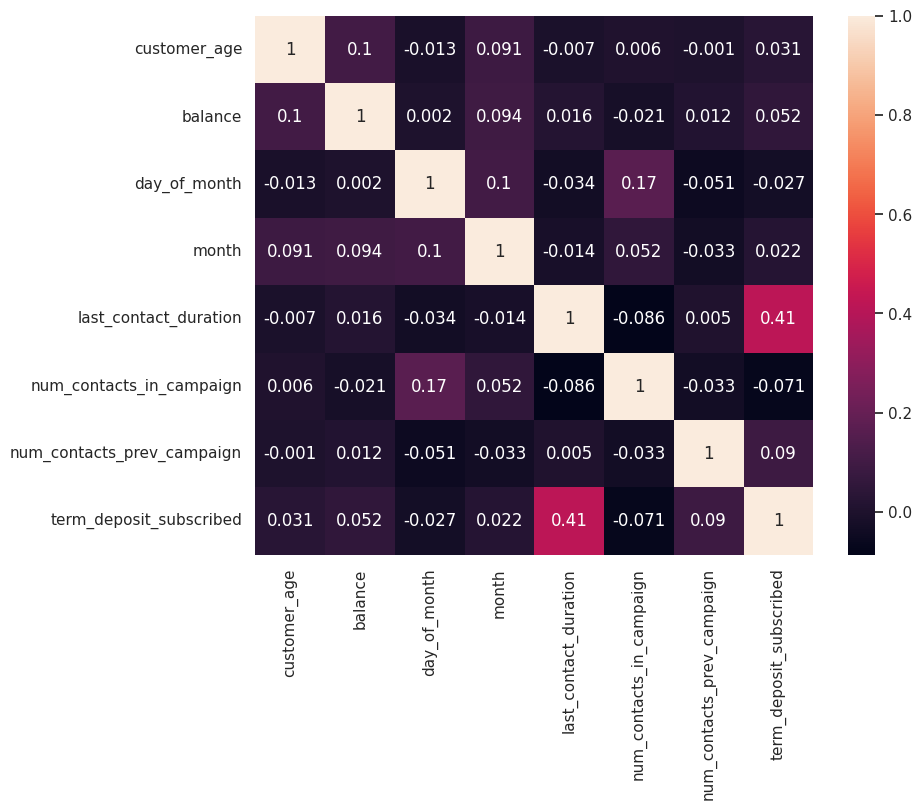

In [ ]:
plt.figure(figsize=(9, 7))
df=round(data1.corr(numeric_only=True),3)
sns.heatmap(df, fmt='.2g', annot=True)

### 1.5.1 Customer Age

#### Distribution

Text(0.5, 0.98, 'Customer distribution by age')

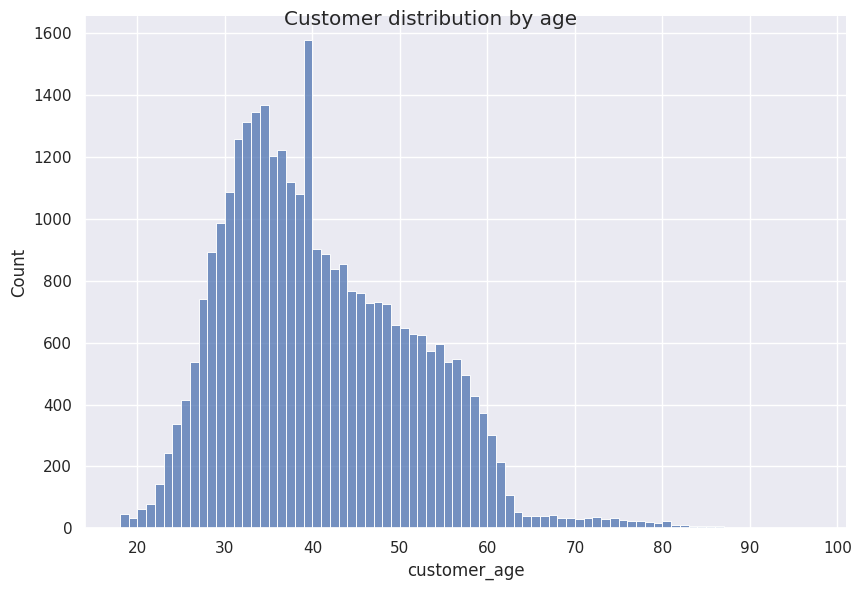

In [ ]:
sns.set_theme(rc={'figure.figsize':(8,5)}) # Figsize can be edited if charts are too large
ax=sns.displot(data=data2,x="customer_age",height=6, aspect=11.7/8)
ax.figure.suptitle("Customer distribution by age")

#### Distribution by age group

Text(0.5, 0.98, 'Customer distribution by Age Group')

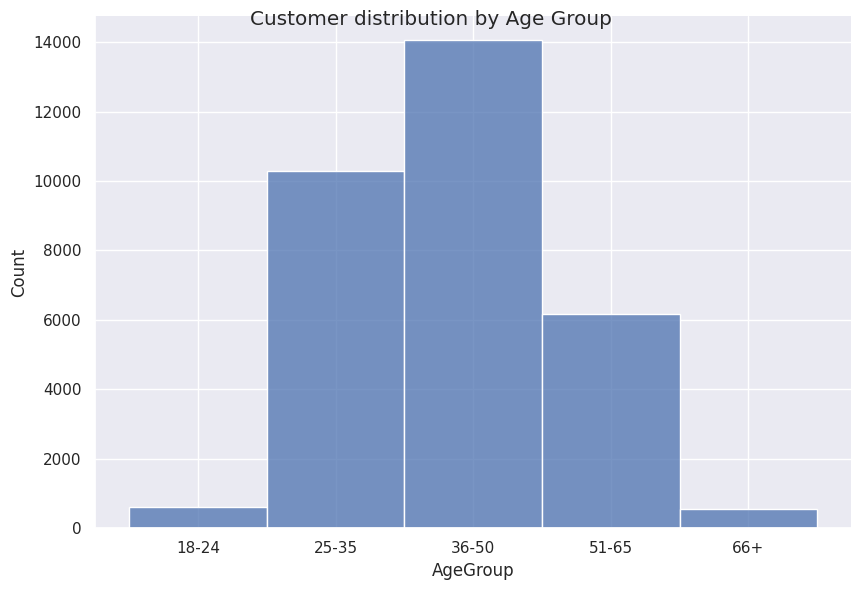

In [ ]:
bins = [18, 24, 35, 50, 65, 100]
labels = ['18-24', '25-35', '36-50', '51-65', '66+']

data2['AgeGroup'] = pd.cut(data2['customer_age'], bins=bins, labels=labels, right=False)

ax1=sns.displot(data=data2,x="AgeGroup",height=6, aspect=11.7/8)
ax1.figure.suptitle("Customer distribution by Age Group")


**Customer distribution by Age Group**:

The Distribution plot provides a more in-depth analysis on customer distribution when plotted in age groups. The graph almost represents a normal distribution and the metrics are as follows.

* Highest proportion of customers are distributed in the age group of 36-50 with about 9500 Individuals.
* Lowest Customer distribution is in the ranges of ages 18-24 and 66+ with both comprising of around 300 customers in each group.

#### Customer balance in each Age Group

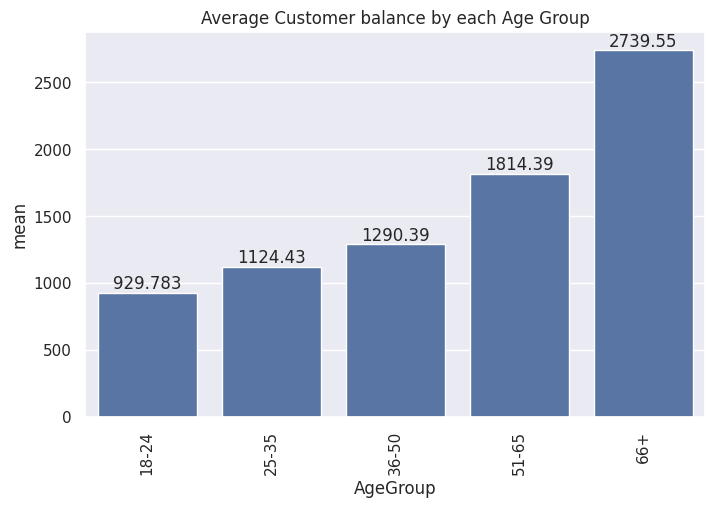

In [ ]:
Bal_vs_age =data2.groupby('AgeGroup')['balance'].agg(['mean']).reset_index()

ax2=sns.barplot(data=Bal_vs_age,x='AgeGroup',y='mean')
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("Average Customer balance by each Age Group")
ax2.bar_label(ax2.containers[0])
plt.show()

**Customer balance in each Age Group**:

The balance amount increases with the Age group, with 18-24 having the lowest average balance of 1019 and gropu 66+ is having the highest balance of 2910.

### 1.5.2 Default

#### Customer default by Age group

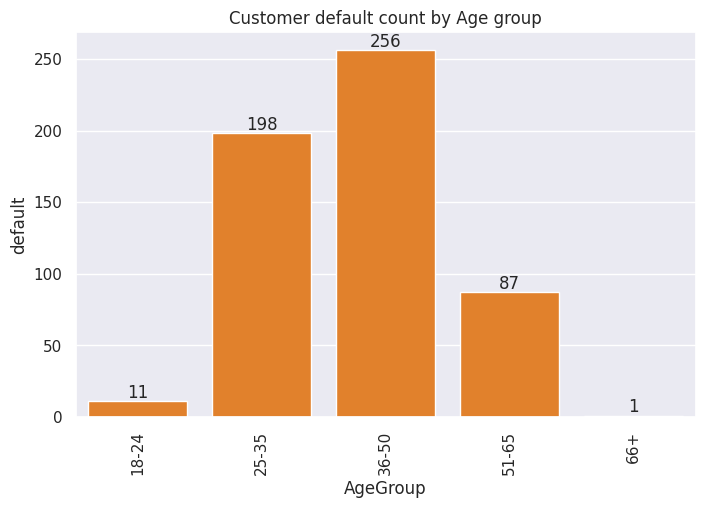

In [ ]:
Def_vs_age =data2.groupby('AgeGroup')['default'].sum().reset_index()

ax3=sns.barplot(data=Def_vs_age,x='AgeGroup',y='default',color="#ff7f0e")
ax3.tick_params(axis='x', rotation=90)
ax3.set_title("Customer default count by Age group")
ax3.bar_label(ax3.containers[0])
plt.show()

#### Customer default proportion by Age group

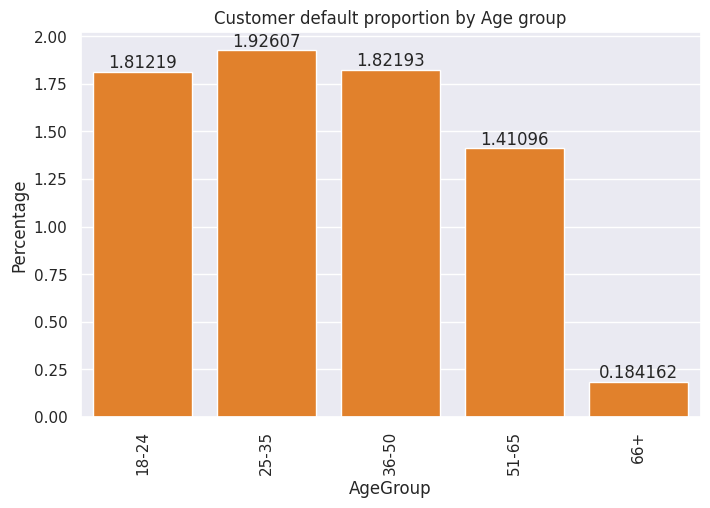

In [ ]:
Def_vs_age =data2.groupby('AgeGroup')['default'].sum().reset_index()
Def=data2['AgeGroup'].value_counts().sort_index().reset_index()
Def_vs_age['Total'] = Def['count']
Def_vs_age['Percentage'] = (Def_vs_age['default'] / Def_vs_age['Total']) * 100

ax3=sns.barplot(data=Def_vs_age,x='AgeGroup',y='Percentage',color="#ff7f0e")
ax3.tick_params(axis='x', rotation=90)
ax3.set_title("Customer default proportion by Age group")
ax3.bar_label(ax3.containers[0])
plt.show()

**Conclusion**:
The proportion of default customers also follows as inverse trend with  **balance** as the highest proportion by total at each group defaulted is from age group 18-24.

#### Customer default proportion by Job Type

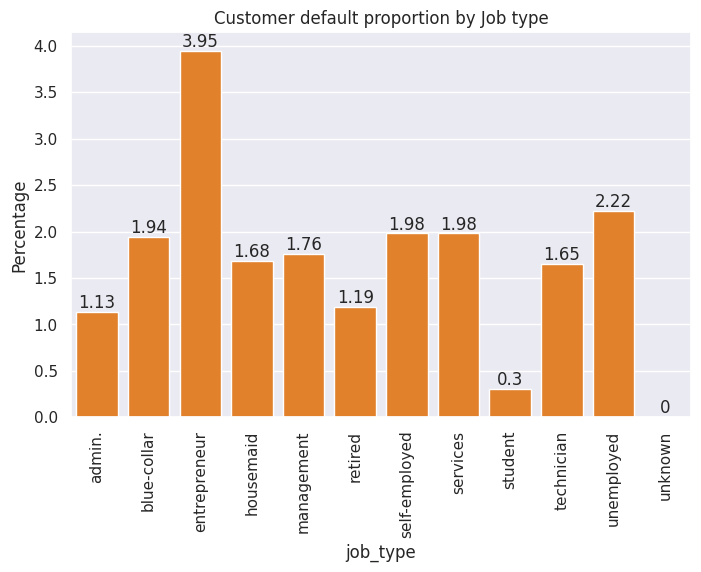

In [ ]:
Def_vs_job =data2.groupby('job_type')['default'].sum().reset_index()
Def=data2['job_type'].value_counts().sort_index().reset_index()
Def_vs_job['Total'] = Def['count']
Def_vs_job['Percentage'] = round(((Def_vs_job['default'] / Def_vs_job['Total']) * 100),2)


ax4=sns.barplot(data=Def_vs_job,x='job_type',y='Percentage',color="#ff7f0e")
ax4.tick_params(axis='x', rotation=90)
ax4.set_title("Customer default proportion by Job type")
ax4.bar_label(ax4.containers[0])
plt.show()

**Conclusion**:
Entrepreneur customers have the highest chance of defaulting with 4.4%, followed by Unemployed customers at 2.3%.

#### Customer default proportion by Marital Status

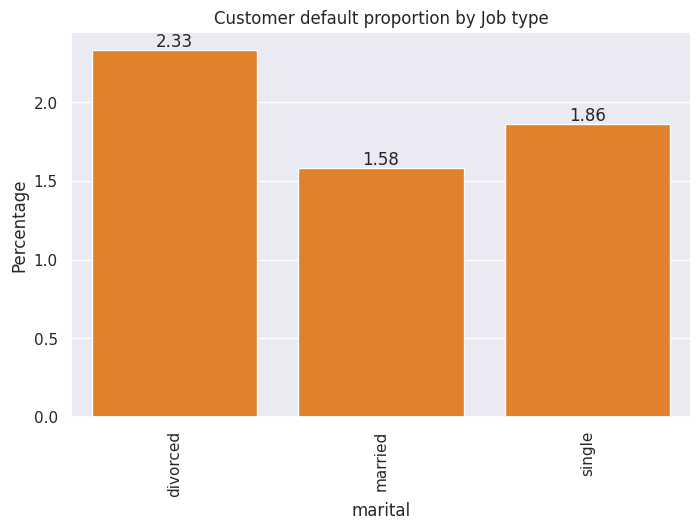

In [ ]:
Def_vs_mar =data2.groupby('marital')['default'].sum().reset_index()
Def=data2['marital'].value_counts().sort_index().reset_index()
Def_vs_mar['Total'] = Def['count']
Def_vs_mar['Percentage'] = round(((Def_vs_mar['default'] / Def_vs_mar['Total']) * 100),2)


ax5=sns.barplot(data=Def_vs_mar,x='marital',y='Percentage',color="#ff7f0e")
ax5.tick_params(axis='x', rotation=90)
ax5.set_title("Customer default proportion by Job type")
ax5.bar_label(ax5.containers[0])
plt.show()

### 1.5.3 Balance

#### Customer Average Balance by Job Type

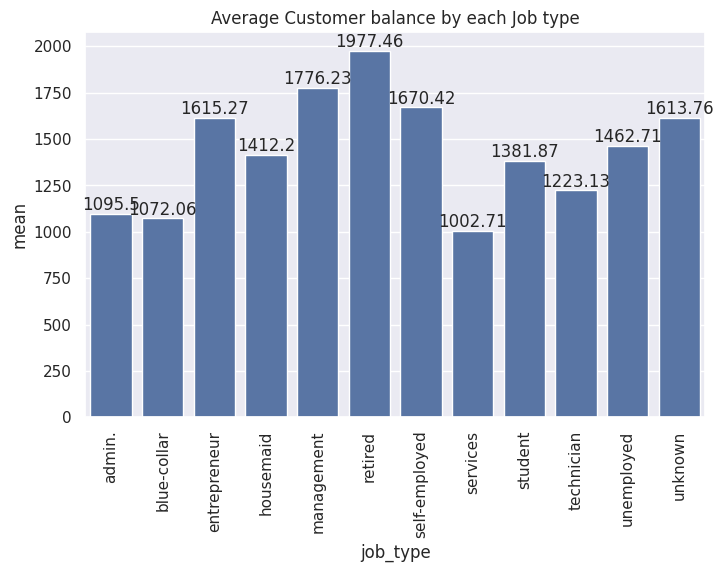

In [ ]:
Bal_vs_job =data2.groupby('job_type')['balance'].agg(['mean']).reset_index()

ax5=sns.barplot(data=Bal_vs_job,x='job_type',y='mean')
ax5.tick_params(axis='x', rotation=90)
ax5.set_title("Average Customer balance by each Job type")
ax5.bar_label(ax5.containers[0])
plt.show()

#### Customer Average Balance by Marital status

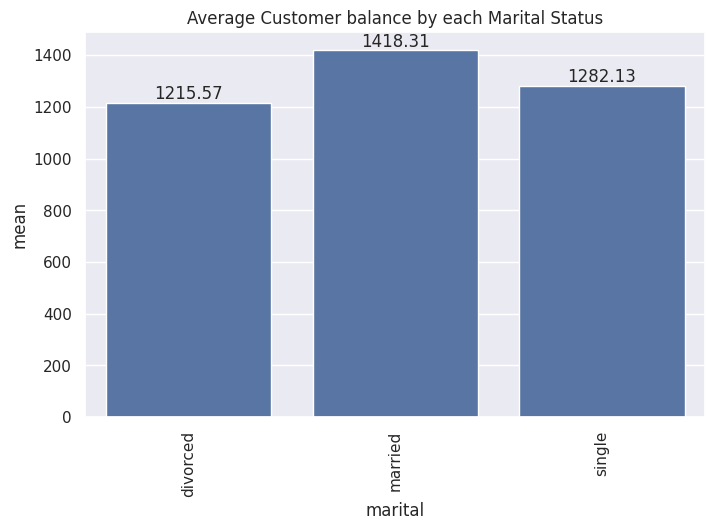

In [ ]:
Bal_vs_mar =data2.groupby('marital')['balance'].agg(['mean']).reset_index()

ax6=sns.barplot(data=Bal_vs_mar,x='marital',y='mean')
ax6.tick_params(axis='x', rotation=90)
ax6.set_title("Average Customer balance by each Marital Status")
ax6.bar_label(ax6.containers[0])
plt.show()

### 1.5.4 Personal Loan

#### Customers with personal loan by Age group

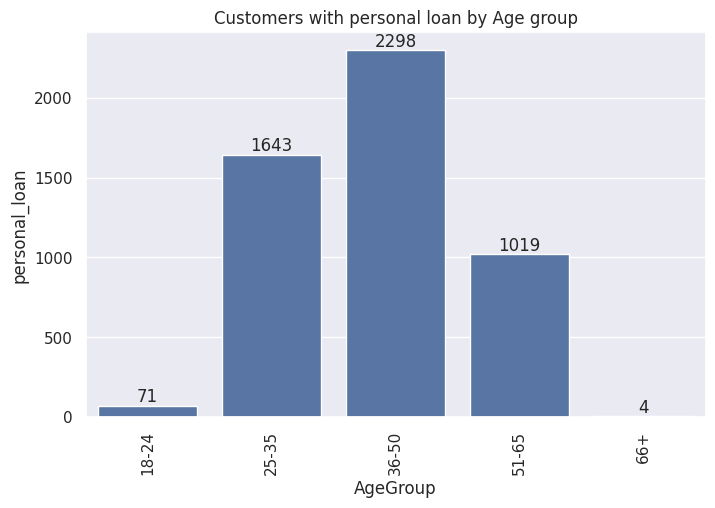

In [ ]:
PL_vs_age =data2.groupby('AgeGroup')['personal_loan'].sum().reset_index()

ax7=sns.barplot(data=PL_vs_age,x='AgeGroup',y='personal_loan')
ax7.tick_params(axis='x', rotation=90)
ax7.set_title("Customers with personal loan by Age group")
ax7.bar_label(ax7.containers[0])
plt.show()

#### Customers with personal loan by proportion

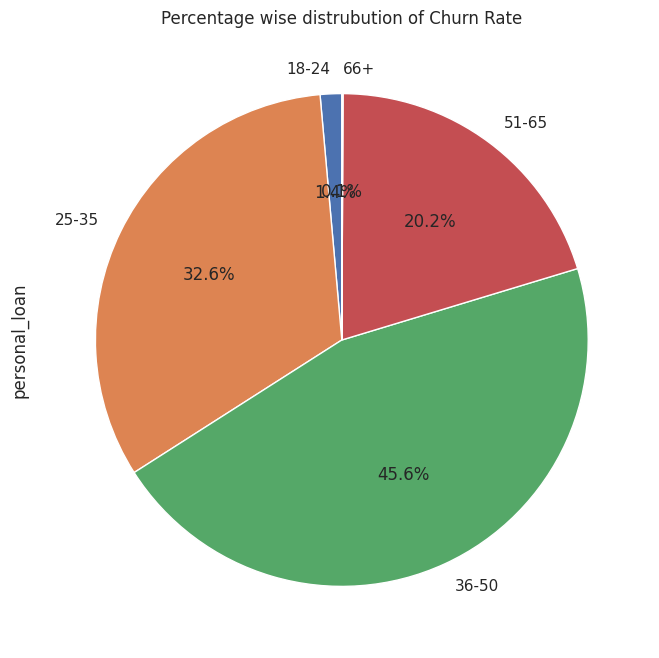

In [ ]:
PL_vs_age =data2.groupby('AgeGroup')['personal_loan'].sum().reset_index()
PL_vs_age["personal_loan"].plot(kind='pie',figsize=(9,8),autopct="%1.1f%%", startangle=90, title='Percentage wise distrubution of Churn Rate',labels=PL_vs_age['AgeGroup'])
plt.show()

#### Customers with personal loan by Marital Status

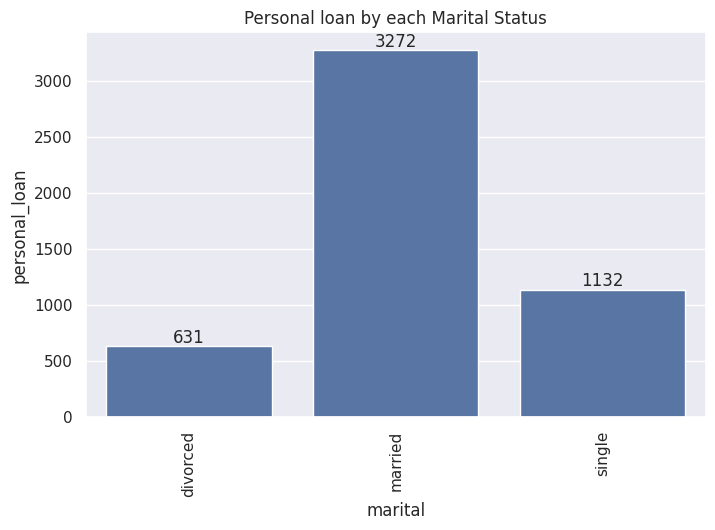

In [ ]:
PL_vs_mar =data2.groupby('marital')['personal_loan'].sum().reset_index()
PL_vs_mar

ax8=sns.barplot(data=PL_vs_mar,x='marital',y='personal_loan')
ax8.tick_params(axis='x', rotation=90)
ax8.set_title("Personal loan by each Marital Status")
ax8.bar_label(ax8.containers[0])
plt.show()

#### Customers with personal loan by Job type

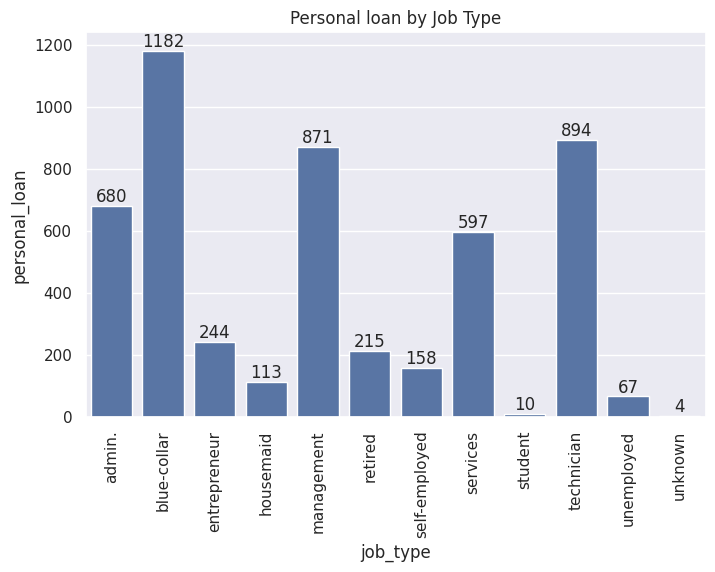

In [ ]:
PL_vs_job =data2.groupby('job_type')['personal_loan'].sum().reset_index()

ax9=sns.barplot(data=PL_vs_job,x='job_type',y='personal_loan')
ax9.tick_params(axis='x', rotation=90)
ax9.set_title("Personal loan by Job Type")
ax9.bar_label(ax9.containers[0])
plt.show()

# Phase 2: Week 2:Classification prediction for Test Data

## 2.1 Functions

### Feature selection Function

In [14]:
KNN_Imputer = KNNImputer(n_neighbors=1)
Simple_Imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

select_scores = {"Chi Square": chi2,"ANOVA F-value classification": f_classif,"Information Gain Classification": mutual_info_classif}

# Feature selection Function for Supervised
def select_k_best_features(dataframe,target, k, select_scores,score_func):

    fs_data=dataframe.copy()
    fs_data = pd.DataFrame(Simple_Imputer.fit_transform(dataframe),columns=dataframe.columns)

    cat_col=list(fs_data.select_dtypes(include='object').columns)
    le = LabelEncoder()

    for col in cat_col:
        fs_data[col] = fs_data[col].astype(str)
        fs_data[col]=(le.fit_transform(fs_data[col]))

    X=fs_data.drop(target,axis=1)
    y=fs_data[target]

    sf = select_scores[score_func]
    selector = SelectKBest(score_func=sf, k=k)
    selector.fit(X, y)
    mask = selector.get_support()
    selected_features = X.columns[mask]

    return list(selected_features)

### Encoding Function

In [15]:
def encode_categorical_columns(df):
    df_encoded = df.copy()  # Make a copy of the DataFrame
    label_encoders = {}
    one_hot_encoders = {}

    for column in df_encoded.select_dtypes(include=['object', 'category']).columns:
        unique_values = df_encoded[column].nunique()

        if unique_values == 2:
            # Label Encoding for binary columns
            le = LabelEncoder()
            df_encoded[column] = le.fit_transform(df_encoded[column])
            label_encoders[column] = le

        else:
            ohe = OneHotEncoder(sparse_output=False, drop='first')
            ohe_df = pd.DataFrame(ohe.fit_transform(df_encoded[[column]]), columns=ohe.get_feature_names_out([column]),
                                  index=df_encoded.index)
            df_encoded = df_encoded.drop(column, axis=1).join(ohe_df)
            one_hot_encoders[column] = ohe

    return df_encoded

### Imputation Function

In [16]:
def imputer(encoded_data,Imputer):
    if Imputer is not None:
        imputer_df = Imputer.fit_transform(encoded_data)
        imputer_df = pd.DataFrame(imputer_df,columns=encoded_data.columns)
    else:
        imputer_df = encoded_data.copy()

    return imputer_df

### Scaling Function

In [17]:
scalers = {'standard': StandardScaler(),'normalize': Normalizer(),'minmax': MinMaxScaler()}

def scale_dataframe(df,scaling_type):
    scaled_df = df.copy()
    if scaling_type == 'None':
        return scaled_df

    elif scaling_type in scalers:
        columns_to_scale = [col for col in scaled_df.columns if scaled_df[col].nunique() > 3]
        stype = scalers[scaling_type]
        scaled_df[columns_to_scale] = stype.fit_transform(scaled_df[columns_to_scale])

    return scaled_df

### Machine Learning Function with MLflow

In [20]:
models = {
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier(),
  'KNN': KNeighborsClassifier(),
  'GradientBoosting': GradientBoostingClassifier()
}


In [21]:
def manual_ml(df_scaled,target,combination):
  dataframe = {}
  X = df_scaled.drop(target, axis=1)
  y = df_scaled[target]
  col=X.columns
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  for name, model in models.items():
    with mlflow.start_run(run_name=combination):
      mlflow.set_tag("model_name", name)

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      y_pred1=model.predict(X_train)

      # Calculate metrics
      train_accuracy = accuracy_score(y_train, y_pred1)
      test_accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average='weighted')
      recall = recall_score(y_test, y_pred, average='weighted')
      f1 = f1_score(y_test, y_pred, average='weighted')

      mlflow.log_metric("train_accuracy", train_accuracy)
      mlflow.log_metric("test_accuracy", test_accuracy)
      mlflow.log_metric("precision", precision)
      mlflow.log_metric("recall", recall)
      mlflow.log_metric("f1", f1)
      mlflow.sklearn.log_model(model, "sk_models")

      dataframe[name] = {
          'Train Accuracy': train_accuracy,
          'Test Accuracy': test_accuracy,
          'Precision': precision,
          'Recall': recall,
          'F1 Score': f1
      }


  dataframe1 = pd.DataFrame(dataframe).T.sort_values(by=['Test Accuracy'],ascending=False)
  return dataframe1, X_train, X_test, y_train, y_test

## 2.1.1 Combination 1

In [ ]:
# ANOVA F-value classification with 6 features
features = select_k_best_features(data2,"term_deposit_subscribed", 6, select_scores,"ANOVA F-value classification")
features.append("term_deposit_subscribed")
df = data2[features]
df.head()

,housing_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,1,unknown,303.0,4.0,0,unknown,0
1,0,cellular,143.0,2.0,1,other,0
2,0,cellular,101.0,4.0,0,unknown,0
3,1,unknown,127.0,3.0,0,unknown,0
4,1,cellular,49.0,2.0,0,unknown,0


In [ ]:
encoded_df = encode_categorical_columns(df)
encoded_df.head()

,housing_loan,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,communication_type_telephone,communication_type_unknown,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,1,303.0,4.0,0,0,0.0,1.0,0.0,0.0,1.0
1,0,143.0,2.0,1,0,0.0,0.0,1.0,0.0,0.0
2,0,101.0,4.0,0,0,0.0,0.0,0.0,0.0,1.0
3,1,127.0,3.0,0,0,0.0,1.0,0.0,0.0,1.0
4,1,49.0,2.0,0,0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# KNN Imputation
imputed_data=imputer(encoded_df,Simple_Imputer)
imputed_data.head()

,housing_loan,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,communication_type_telephone,communication_type_unknown,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,1.0,303.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,143.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,101.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,127.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,49.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# No Scaling
final_data = scale_dataframe(imputed_data,'minmax')
final_data.head()

,housing_loan,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,communication_type_telephone,communication_type_unknown,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,1.0,0.061837,0.048387,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.029184,0.016129,0.003636,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.020612,0.048387,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.025918,0.032258,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.010000,0.016129,0.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final, X_train, X_test, y_train, y_test = manual_ml(final_data,"term_deposit_subscribed","combination 1")
final

2024/07/18 11:17:56 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:17:56] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."


,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
GradientBoosting,0.917417,0.913443,0.901737,0.913443,0.904080
XGBoost,0.924586,0.910858,0.899287,0.910858,0.902371
KNN,0.926897,0.904060,0.893853,0.904060,0.897637
Random Forest,0.974626,0.892187,0.885318,0.892187,0.888400
Decision Tree,0.974673,0.885101,0.879267,0.885101,0.881982


## 2.1.2 Combination 2

In [ ]:

features = select_k_best_features(data2,"term_deposit_subscribed",8, select_scores,"Chi Square")
features.append("term_deposit_subscribed")
df = data2[features]
print("The Features are:")
print(features)
print('-'*50)

encoded_df = encode_categorical_columns(df)

imputed_data=imputer(encoded_df,KNN_Imputer)
final_data = scale_dataframe(imputed_data,'standard')
final, X_train, X_test, y_train, y_test = manual_ml(final_data,"term_deposit_subscribed","combination 2")
final

The Features are:
['customer_age', 'job_type', 'balance', 'housing_loan', 'communication_type', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign', 'term_deposit_subscribed']
--------------------------------------------------


2024/07/18 11:18:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:18:42] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."


,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
Random Forest,1.000000,0.904921,0.890869,0.904921,0.894790
GradientBoosting,0.912371,0.904921,0.891943,0.904921,0.895928
XGBoost,0.951752,0.903102,0.891551,0.903102,0.895636
KNN,0.919964,0.895442,0.877423,0.895442,0.883166
Decision Tree,1.000000,0.870452,0.874644,0.870452,0.872478


## 2.1.3 Combination 3 *

In [ ]:
features = select_k_best_features(data2,"term_deposit_subscribed", 8, select_scores,"Information Gain Classification")
features.append("term_deposit_subscribed")
df = data2[features]
print("The Features are:")
print(features)
print('-'*50)

encoded_df = encode_categorical_columns(df)

imputed_data=imputer(encoded_df,KNN_Imputer)
final_data = scale_dataframe(imputed_data,'standard')
final, X_train, X_test, y_train, y_test = manual_ml(final_data,"term_deposit_subscribed","combination 3")
final

The Features are:
['customer_age', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'num_contacts_prev_campaign', 'prev_campaign_outcome', 'AgeGroup', 'term_deposit_subscribed']
--------------------------------------------------


2024/07/18 12:00:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:00:27] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."


,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
GradientBoosting,0.906381,0.905017,0.885989,0.905017,0.882903
XGBoost,0.920577,0.900038,0.878656,0.900038,0.882097
KNN,0.911852,0.895538,0.872750,0.895538,0.878358
Random Forest,0.942414,0.890751,0.869039,0.890751,0.876070
Decision Tree,0.942461,0.884336,0.863941,0.884336,0.871673


## 2.1.4 Combination 4

In [ ]:
data2['balance'].describe().reset_index()

,index,balance
0,count,31647.000000
1,mean,1356.524599
2,std,3067.545042
3,min,-8020.000000
4,25%,75.000000
5,50%,449.000000
6,75%,1394.000000
7,max,102128.000000


In [ ]:
balance_bins = [-8020, 0, 1000,5000, 10000, 20000, 102128]
balance_labels = ['-10000-0', '0-1000', '1001-5000','5001-10000', '10001-20000', '20001+']

data2['BalanceGroup'] = pd.cut(data2['balance'], bins=bins, labels=labels, right=False)

In [ ]:
data2['BalanceGroup'].value_counts()

BalanceGroup
0-1000         17661
1001-5000       8112
-10000-0        3897
5001-10000      1397
10001-20000      441
20001+           138
Name: count, dtype: int64

In [ ]:
features = select_k_best_features(data2,"term_deposit_subscribed", 8, select_scores,"Chi Square")
features.append("term_deposit_subscribed")
features

['customer_age',
 'balance',
 'housing_loan',
 'communication_type',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign',
 'BalanceGroup',
 'term_deposit_subscribed']

In [ ]:
feature1=['AgeGroup','housing_loan','communication_type','last_contact_duration','num_contacts_in_campaign','num_contacts_prev_campaign','BalanceGroup',
 'term_deposit_subscribed']

df = data2[feature1]
print("The Features are:")
print(feature1)
print('-'*50)

encoded_df = encode_categorical_columns(df)

imputed_data=imputer(encoded_df,KNN_Imputer)
final_data = scale_dataframe(imputed_data,'standard')
final, X_train, X_test, y_train, y_test = manual_ml(final_data,"term_deposit_subscribed",'combination 4')
final

The Features are:
['AgeGroup', 'housing_loan', 'communication_type', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign', 'BalanceGroup', 'term_deposit_subscribed']
--------------------------------------------------


2024/07/18 11:20:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:20:06] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."


,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
GradientBoosting,0.908268,0.905209,0.892445,0.905209,0.896388
XGBoost,0.929680,0.901953,0.889188,0.901953,0.893539
KNN,0.921709,0.891612,0.876778,0.891612,0.882439
Random Forest,0.993774,0.881655,0.874265,0.881655,0.877667
Decision Tree,0.993774,0.862984,0.865667,0.862984,0.864301


## * **Combination 3** is having the highest Test Accuracy. Features, Encoding and Scaling methods will be used as train data

## 2.2 Fine Tuning - GridSearchCV

### Gradient Boosting

In [ ]:
from sklearn.metrics import classification_report

gbc = GradientBoostingClassifier(max_features='log2')

with mlflow.start_run(run_name="GradientBoosting"):
  mlflow.set_tag("model_name", "gbc")
  param_grid = { 'max_depth': [2,3,4],
                'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'n_estimators': [100, 200, 300],
                 'learning_rate': [0.1, 0.01, 0.001]
  }

  grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid,
                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

  grid_search.fit(X_train, y_train)

  best_model = grid_search.best_estimator_

  print(f"Best parameters found: {grid_search.best_params_}")
  print(f"Best cross-validation score: {grid_search.best_score_}")

  mlflow.log_params(grid_search.best_params_)

  print("*"*50)

  y_pred = grid_search.predict(X_test)

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

  print("*"*50)
  print("Best Accuracy Score:", round((grid_search.best_score_)*100,2)," %")
  test_accuracy = best_model.score(X_test, y_test)
  print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
  best_model.fit(X_train, y_train)
  y_pred=best_model.predict(X_test)

  precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
  recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
  f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

  mlflow.log_metric("test_accuracy", test_accuracy)
  mlflow.log_metric("precision", precision)
  mlflow.log_metric("recall", recall)
  mlflow.log_metric("f1", f1)
  mlflow.sklearn.log_model(best_model, "gbc_models")

  print(f'Precision: {precision} %')
  print(f'Recall: {recall} %')
  print(f'F1 Score: {f1:.4f} %')
  print("*"*50)
  print(best_model)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.9037400621960824
**************************************************

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      9348
         1.0       0.63      0.21      0.31      1096

    accuracy                           0.90     10444
   macro avg       0.77      0.60      0.63     10444
weighted avg       0.88      0.90      0.88     10444

**************************************************
Best Accuracy Score: 90.37  %
Test Set Accuracy: 90.41  %
Precision: 88.64 %
Recall: 90.51 %
F1 Score: 88.1900 %
**************************************************
GradientBoostingClassifier(max_features='log2', min_samples_split=10)


### XGBoost

In [ ]:
xgb = XGBClassifier(max_depth=8,use_label_encoder=False, eval_metric='logloss')

xg_param_grid = {
    'learning_rate': [0.1,0.2,0.3],
    'n_estimators': [100,150,200,],
    'reg_alpha': [0.1, 0.5,0.7],
    'reg_lambda': [1.5,2,2.5]
}

xg_grid_search = GridSearchCV(estimator=xgb, param_grid=xg_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
xg_grid_search.fit(X_train, y_train)
best_model = xg_grid_search.best_estimator_

print(f"Best parameters found: {xg_grid_search.best_params_}")
print(f"Best cross-validation score: {xg_grid_search.best_score_}")

print("*"*50)

y_pred = xg_grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("*"*50)
print("Best Accuracy Score:", round((xg_grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

Best parameters found: {'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 2.5}
Best cross-validation score: 0.9003447999786502
**************************************************

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      9348
         1.0       0.58      0.25      0.35      1096

    accuracy                           0.90     10444
   macro avg       0.75      0.61      0.65     10444
weighted avg       0.88      0.90      0.88     10444

**************************************************
Best Accuracy Score: 90.03  %
Test Set Accuracy: 90.21  %
Precision: 88.2 %
Recall: 90.21 %
F1 Score: 88.4400 %
**************************************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical

### Random Forest

In [ ]:
rf = RandomForestClassifier(criterion= 'log_loss',max_depth=10,n_jobs=-1)

rf_param_grid = {
    'n_estimators': [400,450,500],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],

}

rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_model = rf_grid_search.best_estimator_

print(f"Best parameters found: {rf_grid_search.best_params_}")
print(f"Best cross-validation score: {rf_grid_search.best_score_}")

print("*"*50)

y_pred = rf_grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("*"*50)
print("Best Accuracy Score:", round((rf_grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

Best parameters found: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 500}
Best cross-validation score: 0.9035047103093058
**************************************************

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      9348
         1.0       0.65      0.20      0.30      1096

    accuracy                           0.90     10444
   macro avg       0.78      0.59      0.63     10444
weighted avg       0.89      0.90      0.88     10444

**************************************************
Best Accuracy Score: 90.35  %
Test Set Accuracy: 90.47  %
Precision: 88.66 %
Recall: 90.52 %
F1 Score: 88.2100 %
**************************************************
RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=500,
                       n_jobs=-1)


### Exporting the hyperparameter tuned Gradient Boosting model using joblib

In [ ]:
import joblib
filename = 'gbclassifier.joblib'
joblib.dump(best_model, open(filename, 'wb'))

## 2.3 MLFlow Tracking

 Run **mlflow ui --backend-store-uri sqlite:///mlflow.db** on command prompt

## 2.4 Test Data Prediction

### Importing test Dataset

In [79]:
test_data = pd.read_csv("/content/Test.csv")

### Creating the similar fields from Train Dataframe

In [81]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Replace month short names with month numbers
test_data['month'] = test_data['month'].replace(month_map)

In [82]:
balance_bins = [-8020, 0, 1000,5000, 10000, 20000, 102128]
balance_labels = ['-10000-0', '0-1000', '1001-5000','5001-10000', '10001-20000', '20001+']

bins = [18, 24, 35, 50, 65, 100]
labels = ['18-24', '25-35', '36-50', '51-65', '66+']

test_data['AgeGroup'] = pd.cut(test_data['customer_age'], bins=bins, labels=labels, right=False)

test_data['BalanceGroup'] = pd.cut(test_data['balance'], bins=bins, labels=labels, right=False)

### Data preprocessing on Test Data

In [84]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_col = test_data.columns
test_data = pd.DataFrame(imp_mode.fit_transform(test_data),columns = test_col)
test_data.isna().sum().sum()

0

In [85]:
test_data["customer_age"] = pd.to_numeric(test_data.customer_age, errors='coerce')
test_data["month"] = pd.to_numeric(test_data.month, errors='coerce')
test_data["num_contacts_prev_campaign"] = pd.to_numeric(test_data.num_contacts_prev_campaign, errors='coerce')
test_data["AgeGroup"]=test_data["AgeGroup"].astype('category')
test_data["BalanceGroup"]=test_data["BalanceGroup"].astype('category')

In [11]:
features

['customer_age',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'num_contacts_prev_campaign',
 'prev_campaign_outcome',
 'AgeGroup']

### Feature Selection, Encoding and Scaling the Test dataframe similar to train for Prediction

In [89]:
test2 = test_data[features]

df = encode_categorical_columns(test2)
final_data = scale_dataframe(df,'standard')

final_data.head()

,customer_age,housing_loan,personal_loan,month,num_contacts_prev_campaign,communication_type_telephone,communication_type_unknown,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown,AgeGroup_25-35,AgeGroup_36-50,AgeGroup_51-65,AgeGroup_66+
0,1.374820,0,0,0.770160,-0.314336,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.520958,1,0,-0.473860,-0.314336,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.534111,0,0,0.355486,-0.314336,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.468233,0,0,-0.059187,-0.314336,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.028706,0,0,-0.888533,0.253092,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Test Prediction and Download

In [30]:
model = joblib.load(open('gbclassifier.joblib', 'rb'))
model.feature_names_in_

array(['customer_age', 'housing_loan', 'personal_loan', 'month',
       'num_contacts_prev_campaign', 'communication_type_telephone',
       'communication_type_unknown', 'prev_campaign_outcome_other',
       'prev_campaign_outcome_success', 'prev_campaign_outcome_unknown',
       'AgeGroup_25-35', 'AgeGroup_36-50', 'AgeGroup_51-65',
       'AgeGroup_66+'], dtype=object)

In [95]:
y_pred = model.predict(final_data)
y_pred = pd.DataFrame(y_pred)
y_pred.shape

(13564, 1)

In [100]:
test_data['term_deposit_subscribed'] = y_pred
test_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,AgeGroup,BalanceGroup,term_deposit_subscribed
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,8,90.0,2.0,182.0,0,unknown,51-65,66+,0.0
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,5,63.0,2.0,182.0,0,unknown,25-35,66+,0.0
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,7,208.0,1.0,182.0,0,unknown,36-50,66+,0.0
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,6,34.0,1.0,182.0,0,unknown,51-65,66+,0.0
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,4,127.0,1.0,188.0,1,success,51-65,66+,1.0


In [99]:
test_data.to_csv('/content/Test_pred.csv', index=False)

# Phase 2: Week 2 - Clustering Algorithm Selection and Data Transformation

## Objectives


* Algorithm Selection
* Feature Selection
* Data Transformation - Part 2
* Scaling
* Dimensionality Reduction

## 2.0 Algorithm Selection

###**3 Clustering Algorithms will be fitted with the training data.**

#### 1. K-Means Clustering
#### 2. Agglomerative Clustering
#### 3. K-Modes Clustering

### **The best model will be selected with the highest corresponding scores.**

## 2.1 Feature Selection


### **Note:**
To predict with precision whether customers will subscribe to term
deposits after these campaigns, we need select the features with Customer demographics along with if the customer is subscribed to term deposit.

In [ ]:
cols=['customer_age', 'job_type', 'marital', 'education', 'default','balance','housing_loan','personal_loan','term_deposit_subscribed']
data3 = data2[cols]
data3.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,term_deposit_subscribed
0,28.0,management,single,tertiary,0,285.0,1,0,0
1,34.0,blue-collar,married,secondary,0,934.0,0,1,0
2,46.0,technician,married,secondary,0,656.0,0,0,0
3,34.0,services,single,secondary,0,2.0,1,0,0
4,41.0,blue-collar,married,primary,0,1352.0,1,0,0


In [ ]:
#Feature selection using Agglomerative clustering
'''X=data3.copy()

# Step 2: Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform Agglomerative Clustering
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(X_scaled)

# Step 4: Evaluate clustering performance using Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score with all features: {score:.2f}')'''

Silhouette Score with all features: 0.16


In [ ]:
'''feature_names = X.columns

def evaluate_feature_importance(X, feature_names, n_clusters):
    scores = []
    for i in range(X.shape[1]):
        X_temp = np.delete(X, i, axis=1)
        clustering = AgglomerativeClustering(n_clusters=n_clusters)
        labels = clustering.fit_predict(X_temp)
        score = silhouette_score(X_temp, labels)
        scores.append((feature_names[i], score))
        print(f'Silhouette Score without {feature_names[i]}: {score:.2f}')
    return scores

# Evaluate importance of each feature
feature_scores = evaluate_feature_importance(X_scaled, feature_names, n_clusters)

# Step 6: Rank features by importance
feature_scores.sort(key=lambda x: x[1], reverse=True)
print("\nFeature importance ranking (higher is better):")
for feature, score in feature_scores:
    print(f'{feature}: {score:.2f}')'''

Silhouette Score without customer_age: 0.17
Silhouette Score without job_type: 0.23
Silhouette Score without marital: 0.23
Silhouette Score without education: 0.17
Silhouette Score without default: 0.17
Silhouette Score without balance: 0.16
Silhouette Score without housing_loan: 0.23
Silhouette Score without personal_loan: 0.17
Silhouette Score without communication_type: 0.23
Silhouette Score without day_of_month: 0.17
Silhouette Score without month: 0.17
Silhouette Score without last_contact_duration: 0.17
Silhouette Score without num_contacts_in_campaign: 0.17
Silhouette Score without num_contacts_prev_campaign: 0.22
Silhouette Score without prev_campaign_outcome: 0.23


KeyboardInterrupt: 

## 2.2 Data Transformation - Part 2

### 2.2.1 Ordinal Encoding

In [ ]:
data4=data3.copy()
education = [[ 'unknown', 'primary', 'secondary','tertiary']]
job_types = [['unknown', 'retired', 'unemployed', 'student', 'housemaid', 'blue-collar', 'services', 'admin.', 'technician', 'self-employed', 'entrepreneur', 'management']]

oe= {'education' : education, 'job_type' : job_types}
ordinal_dict={}

for i in oe:
  categories = oe[i]
  ordinal_encoder = OrdinalEncoder(categories=categories)
  data4[i] = ordinal_encoder.fit_transform(data4[[i]])
  ordinal_dict[i] = ordinal_encoder


In [ ]:
a1=data4[['job_type','education']]
a2=data[['job_type','education']]
df= pd.concat([a1, a2], axis=1)
df

,job_type,education,job_type,education
0,11.0,3.0,management,tertiary
1,5.0,2.0,blue-collar,secondary
2,8.0,2.0,technician,secondary
3,6.0,2.0,services,secondary
4,5.0,1.0,blue-collar,primary
...,...,...,...,...
31642,7.0,2.0,admin.,secondary
31643,11.0,3.0,management,tertiary
31644,2.0,1.0,unemployed,primary
31645,6.0,2.0,services,secondary


### 2.2.2 One Hot Encoding

In [ ]:
col=['marital']

encoder = OneHotEncoder(drop='first',sparse=False)
one_hot_encoded = encoder.fit_transform(data4[col])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(col))
data4.drop(col, axis=1, inplace=True)
data5 = pd.concat([data4, one_hot_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data5.head()

,customer_age,job_type,education,default,balance,housing_loan,personal_loan,term_deposit_subscribed,marital_married,marital_single
0,28.0,11.0,3.0,0,285.0,1,0,0,0.0,1.0
1,34.0,5.0,2.0,0,934.0,0,1,0,1.0,0.0
2,46.0,8.0,2.0,0,656.0,0,0,0,1.0,0.0
3,34.0,6.0,2.0,0,2.0,1,0,0,0.0,1.0
4,41.0,5.0,1.0,0,1352.0,1,0,0,1.0,0.0


## 2.3 Scaling

### Function for Scaling

In [ ]:
scalers = {'standard': StandardScaler(),'normalize': Normalizer(),'minmax': MinMaxScaler()}

def scale_dataframe(df,scaling_type):
    scaled_df = df.copy()
    if scaling_type == 'none':
        return scaled_df

    columns_to_scale = [col for col in scaled_df.columns if scaled_df[col].nunique() > 3]
    stype = scalers[scaling_type]

    if scaling_type in scalers:
        scaled_df[columns_to_scale] = stype.fit_transform(scaled_df[columns_to_scale])

    return scaled_df

### 2.3.1 Standard Scaling

In [ ]:
std_scaled_df = scale_dataframe(data5,'standard')
std_scaled_df.head()

,customer_age,job_type,education,default,balance,housing_loan,personal_loan,term_deposit_subscribed,marital_married,marital_single
0,-1.165641,1.386059,1.206134,0,-0.349316,1,0,0,0.0,1.0
1,-0.602124,-0.691175,-0.079199,0,-0.137742,0,1,0,1.0,0.0
2,0.524910,0.347442,-0.079199,0,-0.228370,0,0,0,1.0,0.0
3,-0.602124,-0.344970,-0.079199,0,-0.441573,1,0,0,0.0,1.0
4,0.055312,-0.691175,-1.364531,0,-0.001475,1,0,0,1.0,0.0


### 2.3.2 Normalization

In [ ]:
norm_scaled_df = scale_dataframe(data5,'normalize')
norm_scaled_df.head()

,customer_age,job_type,education,default,balance,housing_loan,personal_loan,term_deposit_subscribed,marital_married,marital_single
0,0.097697,0.038381,0.010468,0,0.994421,1,0,0,0.0,1.0
1,0.036378,0.005350,0.002140,0,0.999321,0,1,0,1.0,0.0
2,0.069945,0.012164,0.003041,0,0.997472,0,0,0,1.0,0.0
3,0.981495,0.173205,0.057735,0,0.057735,1,0,0,0.0,1.0
4,0.030311,0.003696,0.000739,0,0.999533,1,0,0,1.0,0.0


### 2.3.3 Min Max Scaling

In [ ]:
minmax_scaled_df = scale_dataframe(data5,'minmax')
minmax_scaled_df.head()

,customer_age,job_type,education,default,balance,housing_loan,personal_loan,term_deposit_subscribed,marital_married,marital_single
0,0.126582,1.000000,1.000000,0,0.075399,1,0,0,0.0,1.0
1,0.202532,0.454545,0.666667,0,0.081291,0,1,0,1.0,0.0
2,0.354430,0.727273,0.666667,0,0.078767,0,0,0,1.0,0.0
3,0.202532,0.545455,0.666667,0,0.072829,1,0,0,0.0,1.0
4,0.291139,0.454545,0.333333,0,0.085086,1,0,0,1.0,0.0


## 2.4 Dimensionality Reduction

### Function for dimensionality Reduction

In [ ]:
from sklearn.decomposition import *
from sklearn.manifold import TSNE
fr={"T-distributed Stochastic Neighbor Embedding":TSNE,"Kernel Principal component analysis":KernelPCA,"Principal component analysis":PCA,
    "Mini-batch Sparse Principal Components Analysis":MiniBatchSparsePCA}

unsup_col=[]
def feature_reduction(scaled_data,n_comp,tech):
    for i in range(0,n_comp):
        col='PCA'+str(i+1)
        unsup_col.append(col)
    dim_reducer=fr[tech]
    reducer = dim_reducer(n_components=n_comp)
    fs_df = reducer.fit_transform(scaled_data)
    fs_df = pd.DataFrame(fs_df, columns=unsup_col)
    return fs_df

### 2.4.1 PCA

In [ ]:
# Dimensionality Reduction of Dataframe using Function
principal_df = feature_reduction(std_scaled_df,2,"Principal component analysis")
principal_df.head()

,PCA1,PCA2
0,-2.268950,-0.597008
1,0.316980,-0.475053
2,0.133705,0.279070
3,-0.119038,-0.927735
4,1.383576,-0.336447


In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(std_scaled_df)

principal_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
principal_df.head()

,PCA1,PCA2
0,-2.268950,-0.597008
1,0.316980,-0.475053
2,0.133705,0.279070
3,-0.119038,-0.927735
4,1.383576,-0.336447
